## Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Import Dataset

In [5]:
path = 'C:/Users/julia/Desktop/Yanjun/Python/Data/final_data.csv6'
car = pd.read_csv(path)
car

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.412947
1,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.413187
2,-0.190566,0.604046,-0.708596,-0.691627,-2.404880,-1.859172,1.086670,-1.188177,-0.689072,0.413187
3,0.136542,-0.431076,0.173698,-0.109354,-0.517266,0.537874,1.086670,0.841625,-0.689072,0.412989
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.413249
...,...,...,...,...,...,...,...,...,...,...
200,1.398245,0.339248,1.721873,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413210
201,1.351515,0.339248,1.721873,-0.837195,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413341
202,1.398245,1.109571,1.721873,-1.128332,0.926204,-1.859172,1.086670,-1.188177,-0.689072,0.413460
203,1.398245,0.435538,1.721873,-0.546059,-1.183483,-1.859172,-0.920243,-1.188177,-0.689072,0.413502


## Split X and y

In [6]:
cond = car.columns == 'price'
features = car.columns[~cond]
X = car[features]
y = car['price']

## Split train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## RANSAC

In [8]:
# X = add_constant(X)

In [9]:
# result = OLS(y,X).fit()
# result.summary()

## Ridge (L2)

In [10]:
# fit the model
ridge = Ridge(alpha = 1)
ridge.fit(X = X_train, y = y_train)
cofficient = ridge.coef_
features = ridge.feature_names_in_
cofficient

array([ 1.73605316e-04,  7.35725962e-05,  3.15589576e-05, -9.20358057e-05,
        5.54657771e-05, -8.20465934e-05,  6.63758807e-05, -9.66527868e-05,
       -1.34632254e-04])

In [11]:
intercept = ridge.intercept_
intercept

0.41262926599802496

In [12]:
ridge.score(X = X_train, y = y_train)

0.866873091413795

In [13]:
# print the regression equation 
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00017 )
 + enginesize * (0.00007 )
 + wheelbase * (0.00003 )
 + highwaympg * (-0.00009 )
 + boreratio * (0.00006 )
 + cylindernumber_four * (-0.00008 )
 + fuelsystem_mpfi * (0.00007 )
 + drivewheel_fwd * (-0.00010 )
 + fuelsystem_2bbl * (-0.00013 )
 + 0.41263


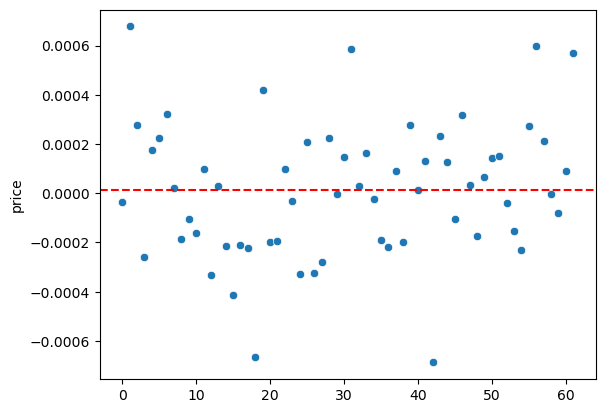

In [14]:
# check the predict
y_predict = ridge.predict(X = X_test)

# check the error 
error_ridge = y_test -  y_predict

# plot the error vs data
sns.scatterplot(x = range(len(X_test)), y = error_ridge, )
plt.axhline(y = error_ridge.mean(), linestyle = '--', color = 'red')
plt.show()
 

In [15]:
# check the r_2 
r2 = r2_score(y_test, y_predict)
r2

0.8091813250239889

## LASSO(L1)

In [16]:
lasso = Lasso(alpha = 0.0003 )
lasso.fit(X = X_train, y = y_train)

Lasso(alpha=0.0003)

In [17]:
cofficient = lasso.coef_
features = lasso.feature_names_in_
cofficient

array([ 1.27346560e-04,  7.59439874e-05,  0.00000000e+00, -1.00873089e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -3.87587157e-06,
       -6.62801534e-06])

In [18]:
intercept = lasso.intercept_

In [19]:
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00013 )
 + enginesize * (0.00008 )
 + wheelbase * (0.00000 )
 + highwaympg * (-0.00010 )
 + boreratio * (0.00000 )
 + cylindernumber_four * (-0.00000 )
 + fuelsystem_mpfi * (0.00000 )
 + drivewheel_fwd * (-0.00000 )
 + fuelsystem_2bbl * (-0.00001 )
 + 0.41262


In [20]:
lasso.score(X = X_train, y = y_train)

0.5764483689078965

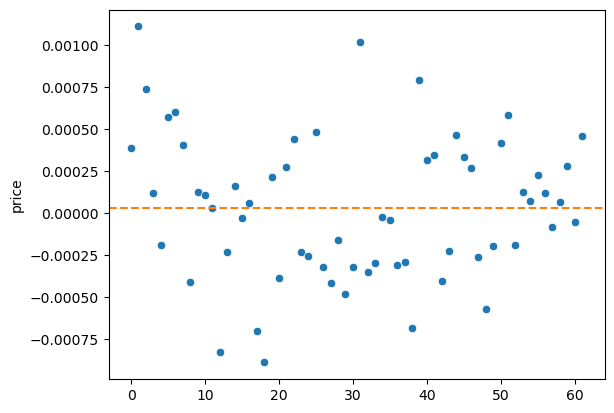

0.5351549781388107

In [21]:
# prdict the result 
y_predict = lasso.predict(X = X_test)

# calculate teh error 
lasso_error = y_test - y_predict

# plot of error vs data
sns.scatterplot(x = range(len(X_test)), y = lasso_error)
plt.axhline(y = lasso_error.mean(), linestyle = '--', color = 'C1' )
plt.show()
r2 = r2_score(y_test, y_predict)
r2

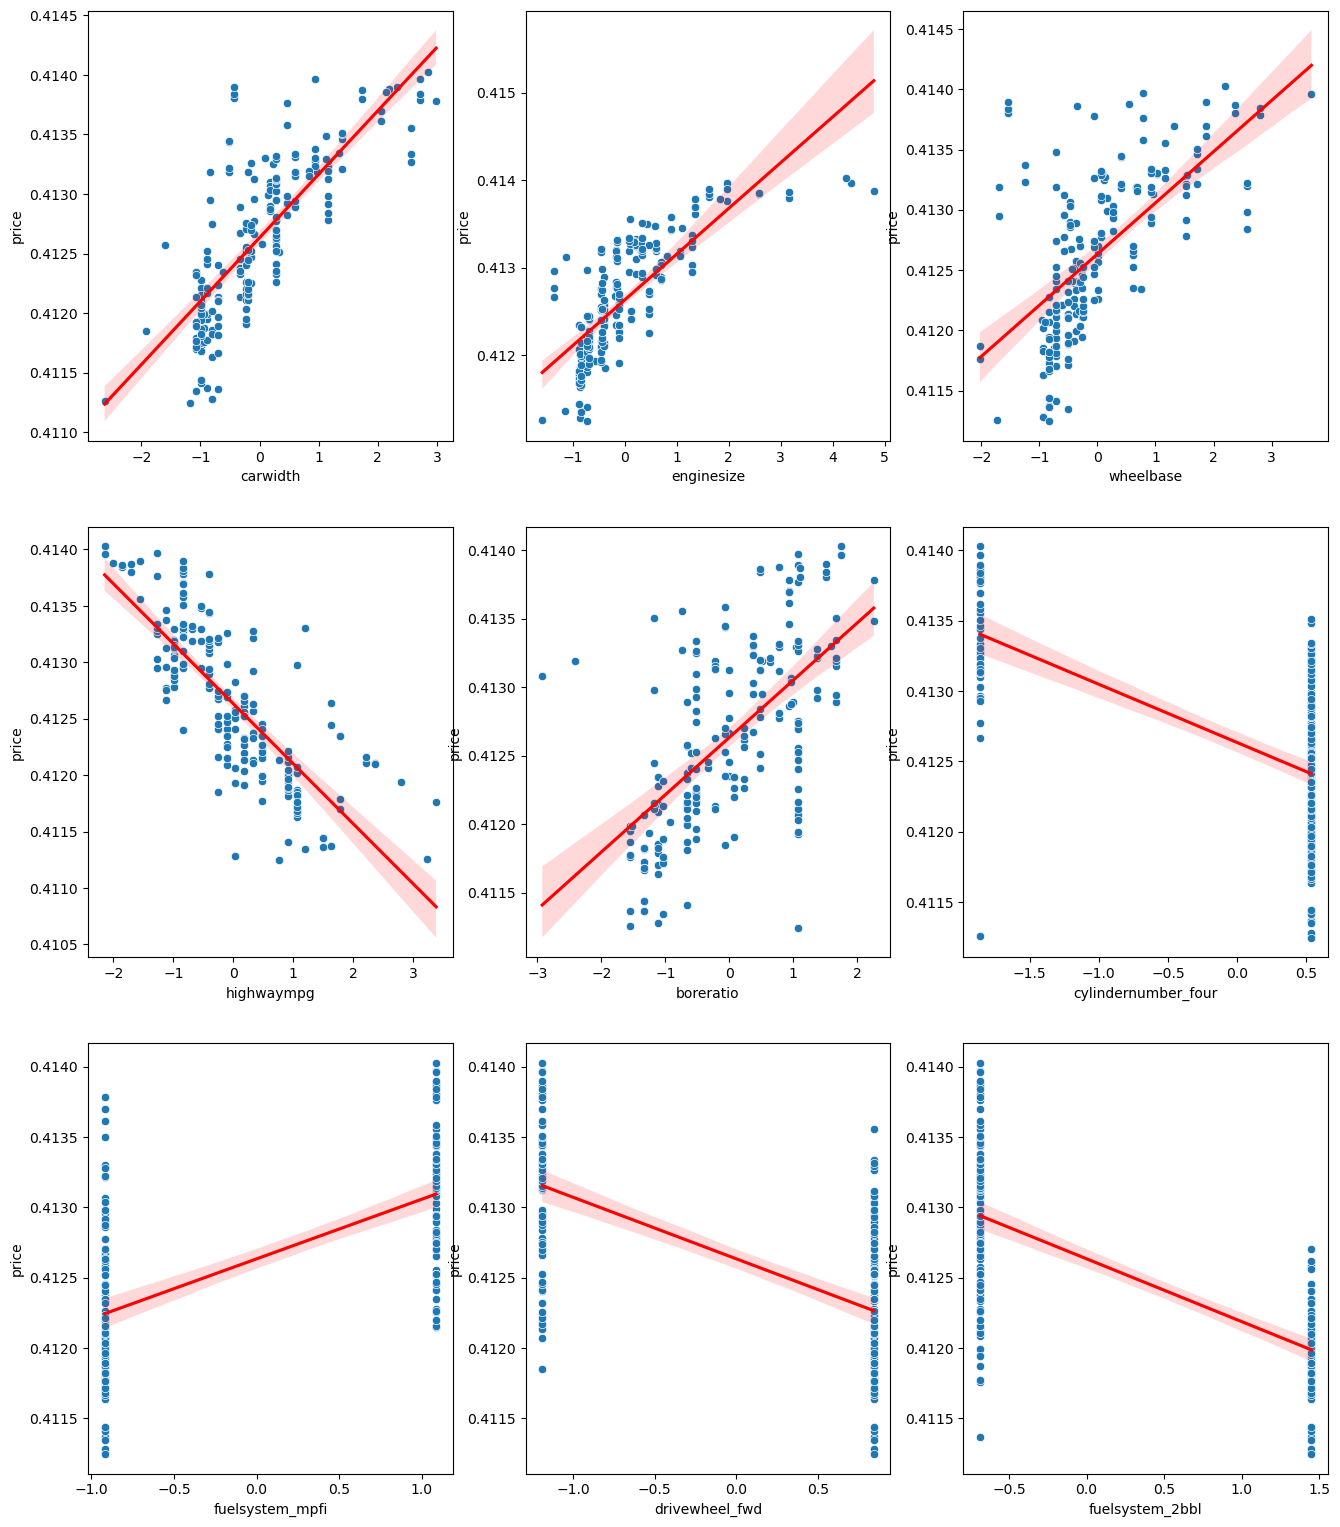

In [22]:
# show the lasso regression plot
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16,19))
axes = np.ravel(axes)
for j,i in enumerate(car.columns[0:-1]):
  sns.scatterplot(data = car, x = i, y = 'price' ,ax = axes[j] )
  sns.regplot(data = car, x= i, y = 'price', marker = '',color = 'red', ax = axes[j])
plt.show()

## Polynomial regression

In [23]:
# first transform X to square and then use liner regression

poly = PolynomialFeatures(2)    ## transfrom all X to square or the product of two features

X_train_2degree = poly.fit_transform(X= X_train)

lr = LinearRegression()
# fit the model
lr.fit(X = X_train_2degree, y = y_train)

LinearRegression()

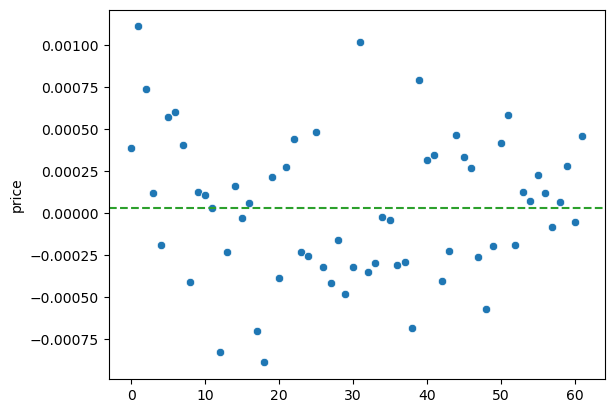

In [24]:
# prdict the result
X_test_2degree = poly.transform(X = X_test)
y_prdict = lr.predict(X = X_test_2degree)

polynomial_error = y_test - y_predict

# plot the error 
sns.scatterplot(x = range(len(X_test)), y = polynomial_error)
plt.axhline(y = polynomial_error.mean(),linestyle = '--', color = 'C2')
plt.show()

In [25]:
X_test_2degree = X_test_2degree.round(5)
X_test_2degree

array([[ 1.     ,  0.93095,  0.09852, ...,  1.41176,  0.81874,  0.47482],
       [ 1.     , -0.42421,  1.6151 , ...,  1.41176,  0.81874,  0.47482],
       [ 1.     ,  0.46365,  0.89292, ...,  1.41176,  0.81874,  0.47482],
       ...,
       [ 1.     ,  2.56649,  0.21888, ...,  0.70833, -0.57994,  0.47482],
       [ 1.     , -0.2373 , -0.407  , ...,  0.70833, -0.57994,  0.47482],
       [ 1.     ,  0.46365, -0.71995, ...,  0.70833, -0.57994,  0.47482]])

In [26]:
X_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl
9,0.930947,0.098522,0.123757,-1.273900,-0.739338,-1.859172,1.086670,-1.188177,-0.689072
128,-0.424215,1.615095,-1.540948,-0.837195,1.518397,-1.859172,1.086670,-1.188177,-0.689072
14,0.463650,0.892917,0.789639,-0.837195,-0.073121,-1.859172,1.086670,-1.188177,-0.689072
194,0.603839,0.339248,0.922815,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072
123,-0.611134,-0.118132,0.756344,-0.109354,0.074927,0.537874,-0.920243,0.841625,1.451227
...,...,...,...,...,...,...,...,...,...
155,-1.078431,-0.840310,-0.508831,0.181783,-1.035435,0.537874,-0.920243,-1.188177,1.451227
177,0.276731,-0.118132,0.606521,0.181783,-0.073121,0.537874,1.086670,0.841625,-0.689072
7,2.566488,0.218885,1.172521,-0.837195,-0.517266,-1.859172,1.086670,0.841625,-0.689072
80,-0.237296,-0.407003,-0.408949,-0.109354,-0.591290,0.537874,-0.920243,0.841625,-0.689072


## Plot the polynomial plots

In [33]:
car_test = pd.concat((X_test, y_test), axis = 1)

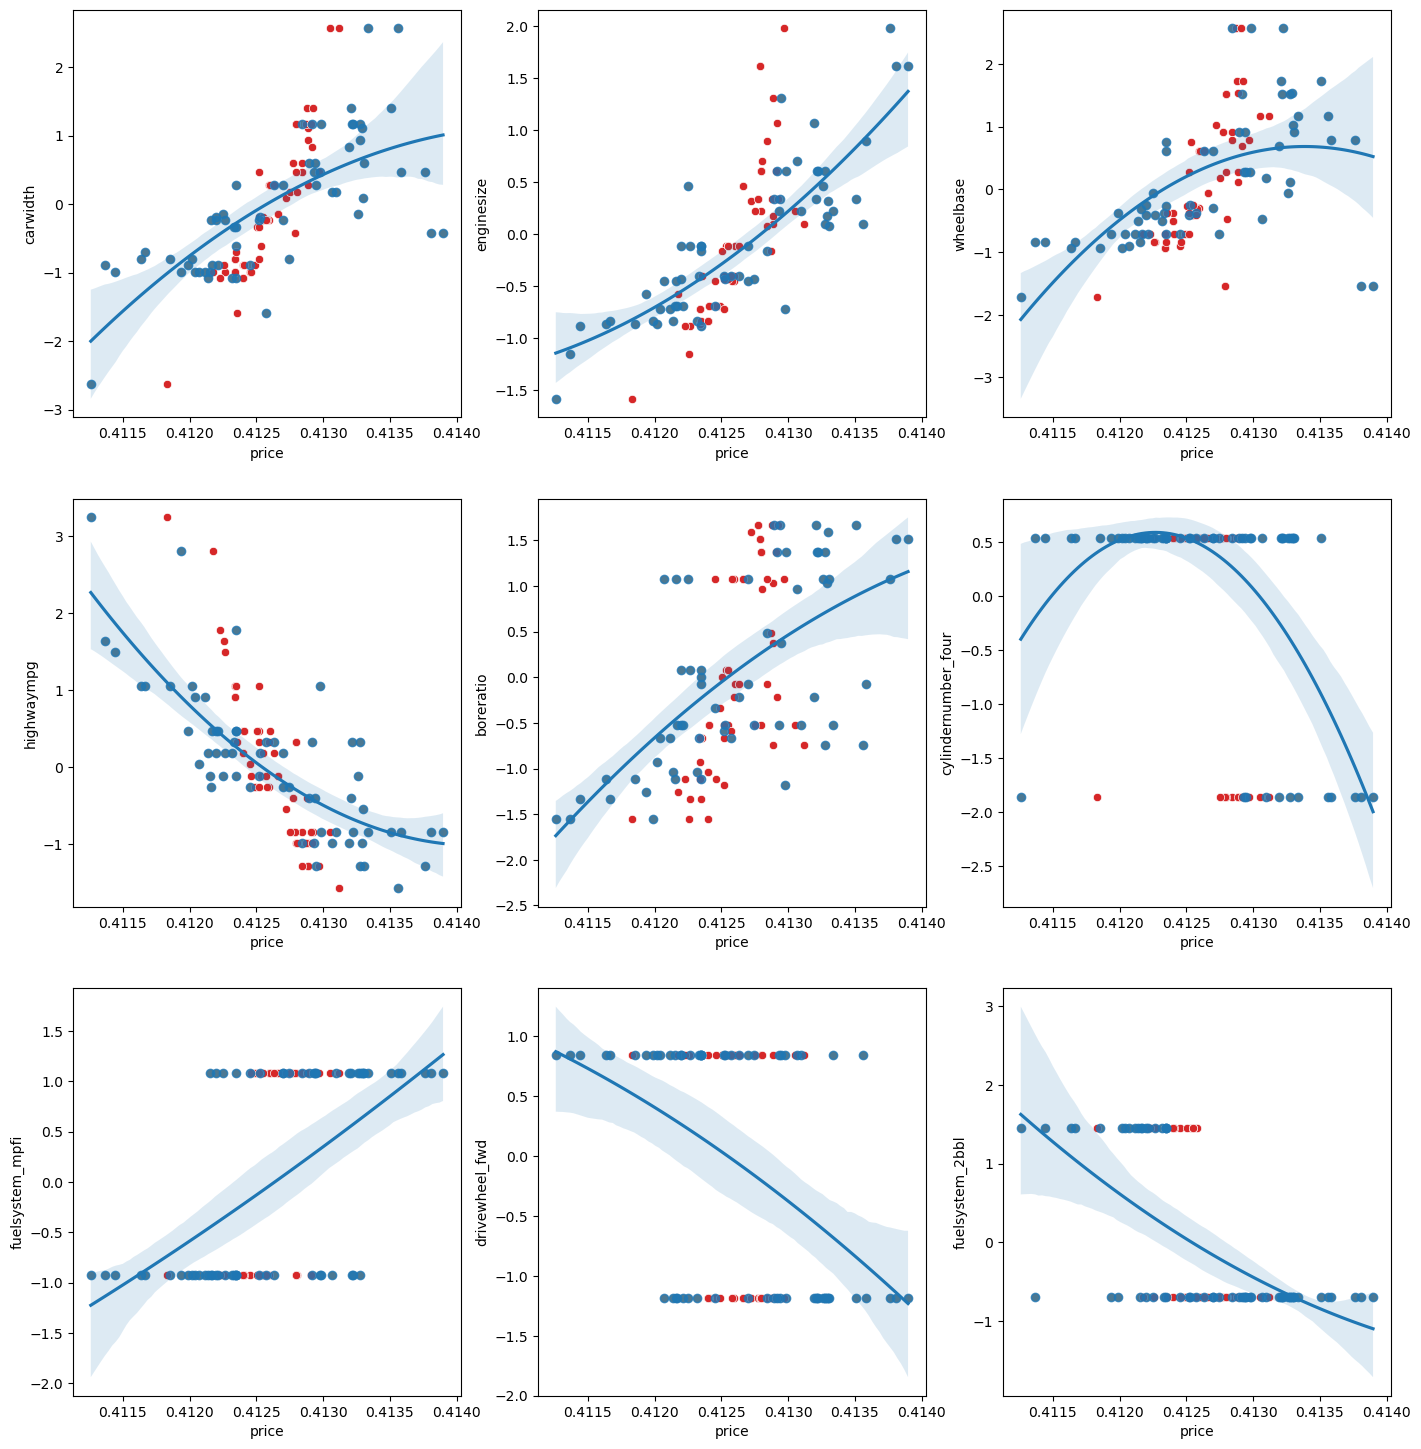

In [43]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)
for i, j in enumerate(car_test.columns[0:-1]):
  sns.scatterplot(data = car_test, x = 'price', y = j, ax= axes[i], color = 'C1' )
  sns.scatterplot(x = y_predict, y = car_test.iloc[:,i], ax= axes[i], color = 'C3')
  sns.regplot(data = car_test, x = 'price', y = j, order = 2, ax= axes[i])
plt.show()

In [ ]:
lr.score(X_test_2degree, y_test)

-2482043099938.131

In [61]:
r2_score(y_test, y_predict)

-0.22061347376460927

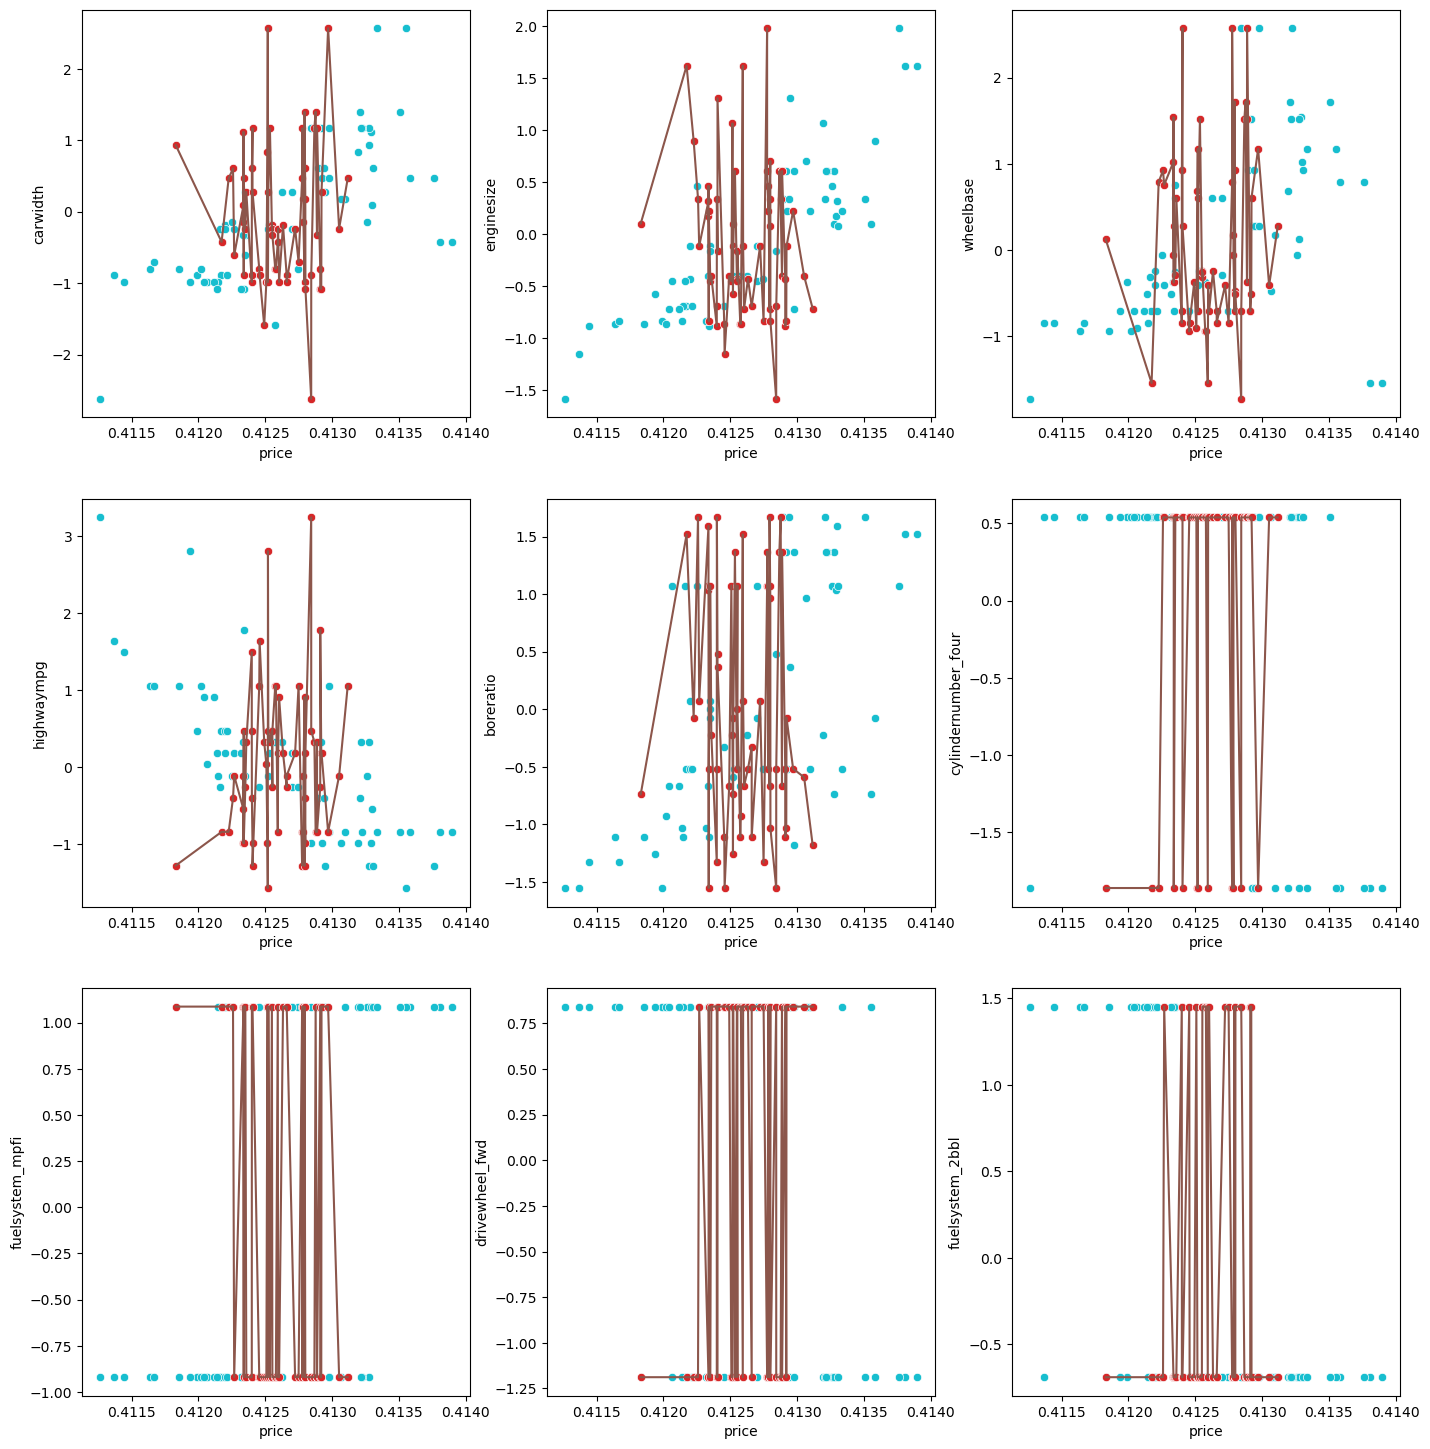

In [70]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)

for i, j in enumerate(car_test.columns[0:-1]):


  sns.scatterplot(data = car_test, x = 'price', y = j, color = 'C9' ,ax = axes[i])
  sns.scatterplot(x = y_predict, y = car_test.iloc[:, i] , color = 'C3', ax= axes[i])
  axes[i].plot(y_predict, car_test.iloc[:, i], color = 'C5', marker = '')
  
plt.show()